# **Assignment: Decision Tree Implementation(Housing Price Data Assignment)**


## **Assignment Instructions**

**Objective:**

The goal of this assignment is to practice web scraping and apply decision tree models to predict housing prices based on scraped data.

**Instructions:**

1. **Choose a City:**
    
    Select a city of your choice for which you will scrape housing data. Examples include Chicago, New York, San Francisco, etc.
    
2. **Data Scraping:**
    - Use web scraping tools to collect housing data from platforms like Zillow or Redfin.
    - Ensure you gather relevant features such as the number of bedrooms, bathrooms, square footage, location, and price.
    - Be mindful of the legal and ethical considerations of web scraping. Check the website's terms of service to ensure compliance.
3. **Data Preparation:**
    - Clean and preprocess the data to handle any missing or inconsistent entries.
    - Encode categorical variables if necessary.
4. **Build a Decision Tree Model:**
    - Use the scraped data to train a decision tree model.
    - Experiment with different features to see which ones are most predictive of housing prices.
5. **Analysis and Reporting:**
    - Analyze the results of your decision tree model.
    - Discuss the features that were most influential in predicting housing prices.
    - Reflect on the challenges faced during data scraping and model building.
6. **Submission:**
    - Submit your Python notebook containing the code for data scraping, preprocessing, model training, and analysis. Please rename your file as your name and the name of the assignment
    - Include a brief report summarizing your findings and any insights gained from the exercise.

**Deadline:**

Submit your completed assignment by next weekend, 23rd Nov.

**Tools and Resources:**

- Python libraries such as BeautifulSoup, Scrapy, or Selenium for web scraping.
- Scikit-learn for building decision tree models.
- Pandas for data manipulation and cleaning.

**Note:**

This assignment is designed to challenge your skills in data collection and machine learning. If you encounter any difficulties, feel free to reach out for guidance. Good luck!

## **Scraping the data**

##### **Preliminary information**


For this assignment, I have chosen New York City as the city for web scraping housing data from Zillow.

##### **Data Scraping**

- I have used Scrapy as the Python library for web scraping housing data from Zillow.
- The website only allowed 20 pages to be scraped, so I could only retrieve about 800 data points.
- I chose the following features:
  - "home_type": home["hdpData"]["homeInfo"].get("homeType", None)
  - "posted": home["hdpData"]["homeInfo"].get("daysOnZillow", None)
  - "home_URL": home.get("detailUrl", None)
  - "home_status": home.get("statusType", None)
  - "home_price": home.get("price", None)
  - "home_address": home.get("address", None)
  - "home_zipcode": home.get("addressZipcode", None)
  - "num_beds": home.get("beds", None)
  - "num_baths": home.get("baths", None)
  - "home_area": home.get("area", None)
- I thought that these would be the most relevant features to predict the housing data.
- Using the Scrapy spiders, I obtained and compiled all the data into one CSV file, which I will import into a dataframe in the next step.

## **Loading the data in dataframe**

In [214]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [215]:
raw_data=pd.read_csv('Data/out.csv')
raw_data

,home_type,posted,home_URL,home_status,home_price,home_address,home_zipcode,num_beds,num_baths,home_area
0,SINGLE_FAMILY,26,https://www.zillow.com/homedetails/78-Ronald-A...,FOR_SALE,"$629,900","78 Ronald Ave, Staten Island, NY 10303",10303,3.0,2,1205.0
1,CONDO,152,https://www.zillow.com/homedetails/100-W-57th-...,FOR_SALE,"$475,000","100 W 57th St #17IH, New York, NY 10019",10019,3.0,3,1800.0
2,CONDO,70,https://www.zillow.com/homedetails/212-E-Tremo...,FOR_SALE,"$275,000","212 E Tremont Ave #9, Bronx, NY 10457",10457,3.0,1,1100.0
3,MULTI_FAMILY,5,https://www.zillow.com/homedetails/6013-Huxley...,FOR_SALE,"$649,000","6013 Huxley Avenue, Bronx, NY 10471",10471,4.0,2,NaN
4,CONDO,56,https://www.zillow.com/homedetails/219-W-144th...,FOR_SALE,"$275,000","219 W 144th St APT 34, New York, NY 10030",10030,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...
815,CONDO,181,https://www.zillow.com/homedetails/40-E-80th-S...,FOR_SALE,"$550,000","40 E 80th St APT 4-B, New York, NY 10075",10075,1.0,2,0.0
816,MULTI_FAMILY,60,https://www.zillow.com/homedetails/103-28-104t...,FOR_SALE,"$1,949,000","103-28 104th Street, Ozone Park, NY 11417",11417,10.0,6,3876.0
817,CONDO,25,https://www.zillow.com/homedetails/103-25-68th...,FOR_SALE,"$825,000","103-25 68th Ave #7O, Forest Hills, NY 11375",11375,3.0,2,1300.0
818,SINGLE_FAMILY,277,https://www.zillow.com/homedetails/1415-Chandl...,FOR_SALE,"$250,000","1415 Chandler St, Far Rockaway, NY 11691",11691,4.0,2,1764.0


In [216]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   home_type     820 non-null    object 
 1   posted        820 non-null    int64  
 2   home_URL      820 non-null    object 
 3   home_status   820 non-null    object 
 4   home_price    820 non-null    object 
 5   home_address  820 non-null    object 
 6   home_zipcode  820 non-null    int64  
 7   num_beds      812 non-null    float64
 8   num_baths     820 non-null    int64  
 9   home_area     731 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 64.2+ KB


In [217]:
raw_data.describe()

,posted,home_zipcode,num_beds,num_baths,home_area
count,820.000000,820.000000,812.000000,820.000000,731.000000
mean,75.986585,10717.803659,3.149015,2.581707,1908.381669
std,91.097881,606.066105,1.887387,2.033758,2803.647057
min,0.000000,10001.000000,0.000000,0.000000,0.000000
25%,12.000000,10065.000000,2.000000,1.000000,648.000000
50%,46.000000,10466.000000,3.000000,2.000000,1250.000000
75%,98.000000,11355.000000,4.000000,3.000000,2158.000000
max,695.000000,14072.000000,15.000000,17.000000,33000.000000


## **Data cleaning and processing**

In [218]:
working_data = raw_data.copy()
working_data.dropna(inplace=True)
working_data.reset_index(drop=True, inplace=True)
working_data

,home_type,posted,home_URL,home_status,home_price,home_address,home_zipcode,num_beds,num_baths,home_area
0,SINGLE_FAMILY,26,https://www.zillow.com/homedetails/78-Ronald-A...,FOR_SALE,"$629,900","78 Ronald Ave, Staten Island, NY 10303",10303,3.0,2,1205.0
1,CONDO,152,https://www.zillow.com/homedetails/100-W-57th-...,FOR_SALE,"$475,000","100 W 57th St #17IH, New York, NY 10019",10019,3.0,3,1800.0
2,CONDO,70,https://www.zillow.com/homedetails/212-E-Tremo...,FOR_SALE,"$275,000","212 E Tremont Ave #9, Bronx, NY 10457",10457,3.0,1,1100.0
3,CONDO,56,https://www.zillow.com/homedetails/219-W-144th...,FOR_SALE,"$275,000","219 W 144th St APT 34, New York, NY 10030",10030,3.0,1,0.0
4,SINGLE_FAMILY,13,https://www.zillow.com/homedetails/142-53-122n...,FOR_SALE,"$599,000","142-53 122nd Ave, Jamaica, NY 11436",11436,3.0,3,1100.0
...,...,...,...,...,...,...,...,...,...,...
721,CONDO,181,https://www.zillow.com/homedetails/40-E-80th-S...,FOR_SALE,"$550,000","40 E 80th St APT 4-B, New York, NY 10075",10075,1.0,2,0.0
722,MULTI_FAMILY,60,https://www.zillow.com/homedetails/103-28-104t...,FOR_SALE,"$1,949,000","103-28 104th Street, Ozone Park, NY 11417",11417,10.0,6,3876.0
723,CONDO,25,https://www.zillow.com/homedetails/103-25-68th...,FOR_SALE,"$825,000","103-25 68th Ave #7O, Forest Hills, NY 11375",11375,3.0,2,1300.0
724,SINGLE_FAMILY,277,https://www.zillow.com/homedetails/1415-Chandl...,FOR_SALE,"$250,000","1415 Chandler St, Far Rockaway, NY 11691",11691,4.0,2,1764.0


In [219]:
print("Unique values in home_type column:", working_data['home_type'].unique())
print("Unique values in home_status column:", working_data['home_status'].unique())
print("Unique values in home_price column:", working_data['home_price'].unique())
print("Unique values in home_area column:", working_data['home_area'].unique())

Unique values in home_type column: ['SINGLE_FAMILY' 'CONDO' 'MULTI_FAMILY' 'TOWNHOUSE' 'APARTMENT']
Unique values in home_status column: ['FOR_SALE']
Unique values in home_price column: ['$629,900' '$475,000' '$275,000' '$599,000' '$239,000' '$274,000'
 '$873,800' '$159,900' '$899,999' '$775,000' '$499,000' '$1,495,000'
 '$748,000' '$838,000' '$699,000' '$675,000' '$169,000' '$250,000'
 '$399,000' '$490,000' '$99,000' '$290,000' '$650,000' '$199,000'
 '$269,995' '$575,000' '$1,100,000' '$44,500,000' '$1,449,000'
 '$105,000,000' '$4,000,000' '$1,188,888' '$299,999' '$975,000' '$329,000'
 '$799,000' '$299,000' '$788,000' '$999,000' '$150,000,000' '$85,000,000'
 '$950,000' '$49,000,000' '$879,000' '$800,000' '$879,900' '$219,999'
 '$795,000' '$849,000' '$515,000' '$649,000' '$829,998' '$450,000'
 '$90,000' '$470,000' '$500,000' '$18,000,000' '$999,999' '$218,000'
 '$550,000' '$589,000' '$438,000' '$499,500' '$599,900' '$65,000,000'
 '$3,900,000' '$2,850,000' '$5,295,000' '$20,000,000' '$5

In [220]:
print(working_data.nunique())

home_type         5
posted          185
home_URL        725
home_status       1
home_price      435
home_address    725
home_zipcode    155
num_beds         14
num_baths        15
home_area       386
dtype: int64


In [221]:
working_data.drop(columns=['home_status','home_URL'], inplace=True)
working_data

,home_type,posted,home_price,home_address,home_zipcode,num_beds,num_baths,home_area
0,SINGLE_FAMILY,26,"$629,900","78 Ronald Ave, Staten Island, NY 10303",10303,3.0,2,1205.0
1,CONDO,152,"$475,000","100 W 57th St #17IH, New York, NY 10019",10019,3.0,3,1800.0
2,CONDO,70,"$275,000","212 E Tremont Ave #9, Bronx, NY 10457",10457,3.0,1,1100.0
3,CONDO,56,"$275,000","219 W 144th St APT 34, New York, NY 10030",10030,3.0,1,0.0
4,SINGLE_FAMILY,13,"$599,000","142-53 122nd Ave, Jamaica, NY 11436",11436,3.0,3,1100.0
...,...,...,...,...,...,...,...,...
721,CONDO,181,"$550,000","40 E 80th St APT 4-B, New York, NY 10075",10075,1.0,2,0.0
722,MULTI_FAMILY,60,"$1,949,000","103-28 104th Street, Ozone Park, NY 11417",11417,10.0,6,3876.0
723,CONDO,25,"$825,000","103-25 68th Ave #7O, Forest Hills, NY 11375",11375,3.0,2,1300.0
724,SINGLE_FAMILY,277,"$250,000","1415 Chandler St, Far Rockaway, NY 11691",11691,4.0,2,1764.0


In [222]:
working_data.drop(columns=['home_address', 'home_zipcode'], inplace=True)
working_data

,home_type,posted,home_price,num_beds,num_baths,home_area
0,SINGLE_FAMILY,26,"$629,900",3.0,2,1205.0
1,CONDO,152,"$475,000",3.0,3,1800.0
2,CONDO,70,"$275,000",3.0,1,1100.0
3,CONDO,56,"$275,000",3.0,1,0.0
4,SINGLE_FAMILY,13,"$599,000",3.0,3,1100.0
...,...,...,...,...,...,...
721,CONDO,181,"$550,000",1.0,2,0.0
722,MULTI_FAMILY,60,"$1,949,000",10.0,6,3876.0
723,CONDO,25,"$825,000",3.0,2,1300.0
724,SINGLE_FAMILY,277,"$250,000",4.0,2,1764.0


In [223]:
def convert_price(value):
    if isinstance(value, (int, float)):
        return value
    value = value.replace('$', '').replace(',', '')
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    else:
        return float(value)

In [224]:
working_data['home_price']=working_data['home_price'].apply(convert_price)
working_data

,home_type,posted,home_price,num_beds,num_baths,home_area
0,SINGLE_FAMILY,26,629900.0,3.0,2,1205.0
1,CONDO,152,475000.0,3.0,3,1800.0
2,CONDO,70,275000.0,3.0,1,1100.0
3,CONDO,56,275000.0,3.0,1,0.0
4,SINGLE_FAMILY,13,599000.0,3.0,3,1100.0
...,...,...,...,...,...,...
721,CONDO,181,550000.0,1.0,2,0.0
722,MULTI_FAMILY,60,1949000.0,10.0,6,3876.0
723,CONDO,25,825000.0,3.0,2,1300.0
724,SINGLE_FAMILY,277,250000.0,4.0,2,1764.0


In [225]:
working_data.dtypes

home_type      object
posted          int64
home_price    float64
num_beds      float64
num_baths       int64
home_area     float64
dtype: object

In [226]:
working_data = working_data[working_data['home_area'] != 0]
working_data.reset_index(drop=True, inplace=True)
working_data

,home_type,posted,home_price,num_beds,num_baths,home_area
0,SINGLE_FAMILY,26,629900.0,3.0,2,1205.0
1,CONDO,152,475000.0,3.0,3,1800.0
2,CONDO,70,275000.0,3.0,1,1100.0
3,SINGLE_FAMILY,13,599000.0,3.0,3,1100.0
4,CONDO,7,239000.0,2.0,2,1200.0
...,...,...,...,...,...,...
556,CONDO,320,20000000.0,4.0,5,4665.0
557,MULTI_FAMILY,60,1949000.0,10.0,6,3876.0
558,CONDO,25,825000.0,3.0,2,1300.0
559,SINGLE_FAMILY,277,250000.0,4.0,2,1764.0


In [227]:
working_data = pd.get_dummies(working_data, columns=['home_type'], drop_first=True)
working_data

,posted,home_price,num_beds,num_baths,home_area,home_type_CONDO,home_type_MULTI_FAMILY,home_type_SINGLE_FAMILY,home_type_TOWNHOUSE
0,26,629900.0,3.0,2,1205.0,False,False,True,False
1,152,475000.0,3.0,3,1800.0,True,False,False,False
2,70,275000.0,3.0,1,1100.0,True,False,False,False
3,13,599000.0,3.0,3,1100.0,False,False,True,False
4,7,239000.0,2.0,2,1200.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...
556,320,20000000.0,4.0,5,4665.0,True,False,False,False
557,60,1949000.0,10.0,6,3876.0,False,True,False,False
558,25,825000.0,3.0,2,1300.0,True,False,False,False
559,277,250000.0,4.0,2,1764.0,False,False,True,False


## **Training decision tree model**

In [228]:
def decision_tree_model(df,features):
  X = df[features]
  y = df['home_price']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = DecisionTreeRegressor(random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f"Features: {features}\n")
  print(f"Mean Squared Error: {mse}")
  print(f"R^2 Score: {r2}")
  plt.figure(figsize=(20,10))
  plot_tree(model, feature_names=X.columns, filled=True)
  plt.show()

#### **Decision tree without categorical variables**

##### **With features: posted days, number of beds, number of bathrooms, and area**

Mean Squared Error: 114450048197726.4
R^2 Score: 0.29782166833407075


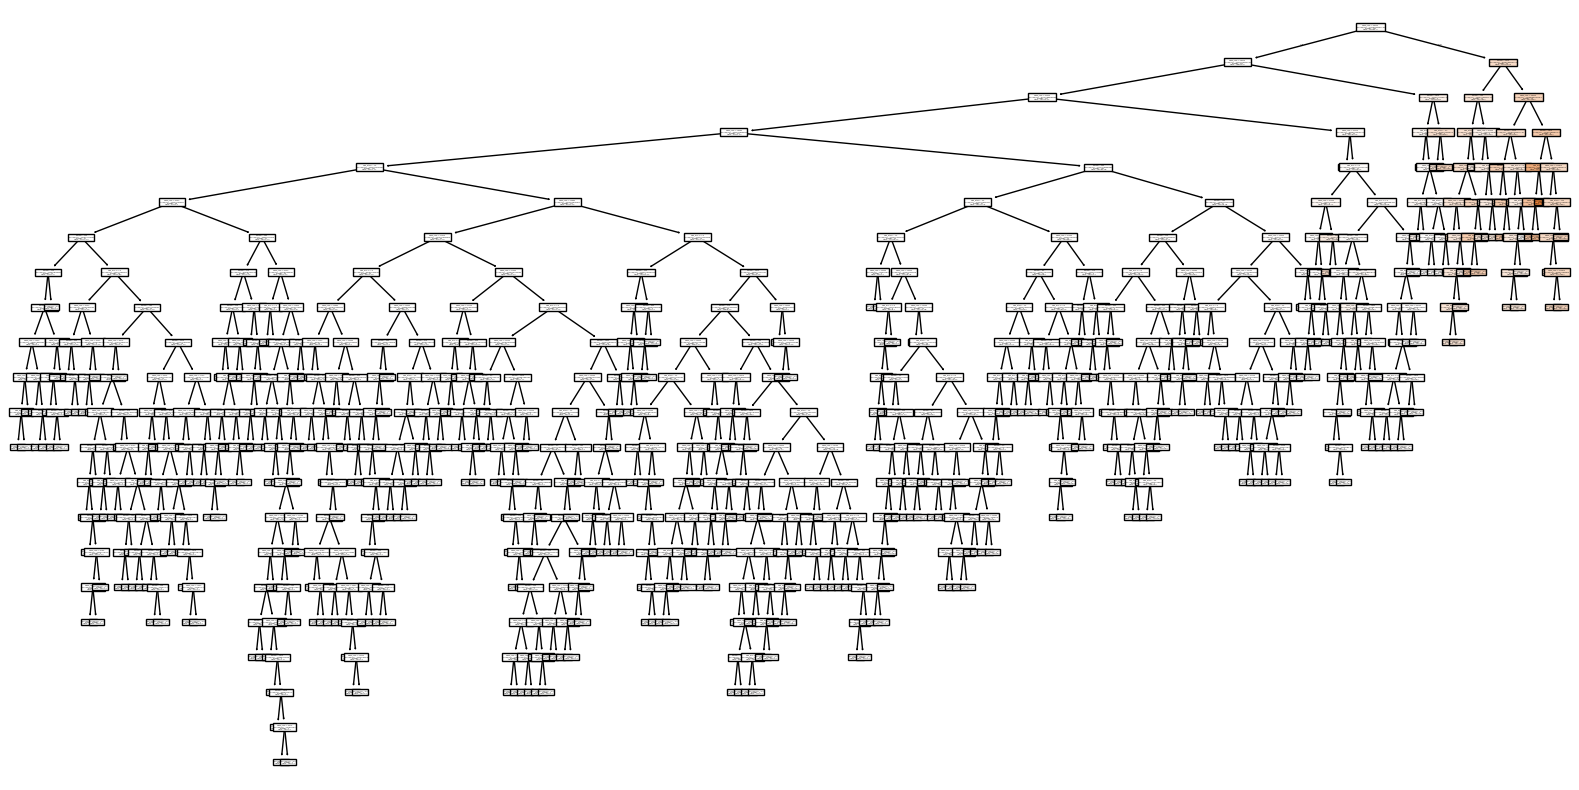

In [ ]:
features=['posted','num_beds', 'num_baths', 'home_area']
decision_tree_model(working_data,features)

##### **With features: posted days, number of beds, and area**

Features: ['posted', 'num_beds', 'home_area']

Mean Squared Error: 102935315642706.69
R^2 Score: 0.3684672977801554


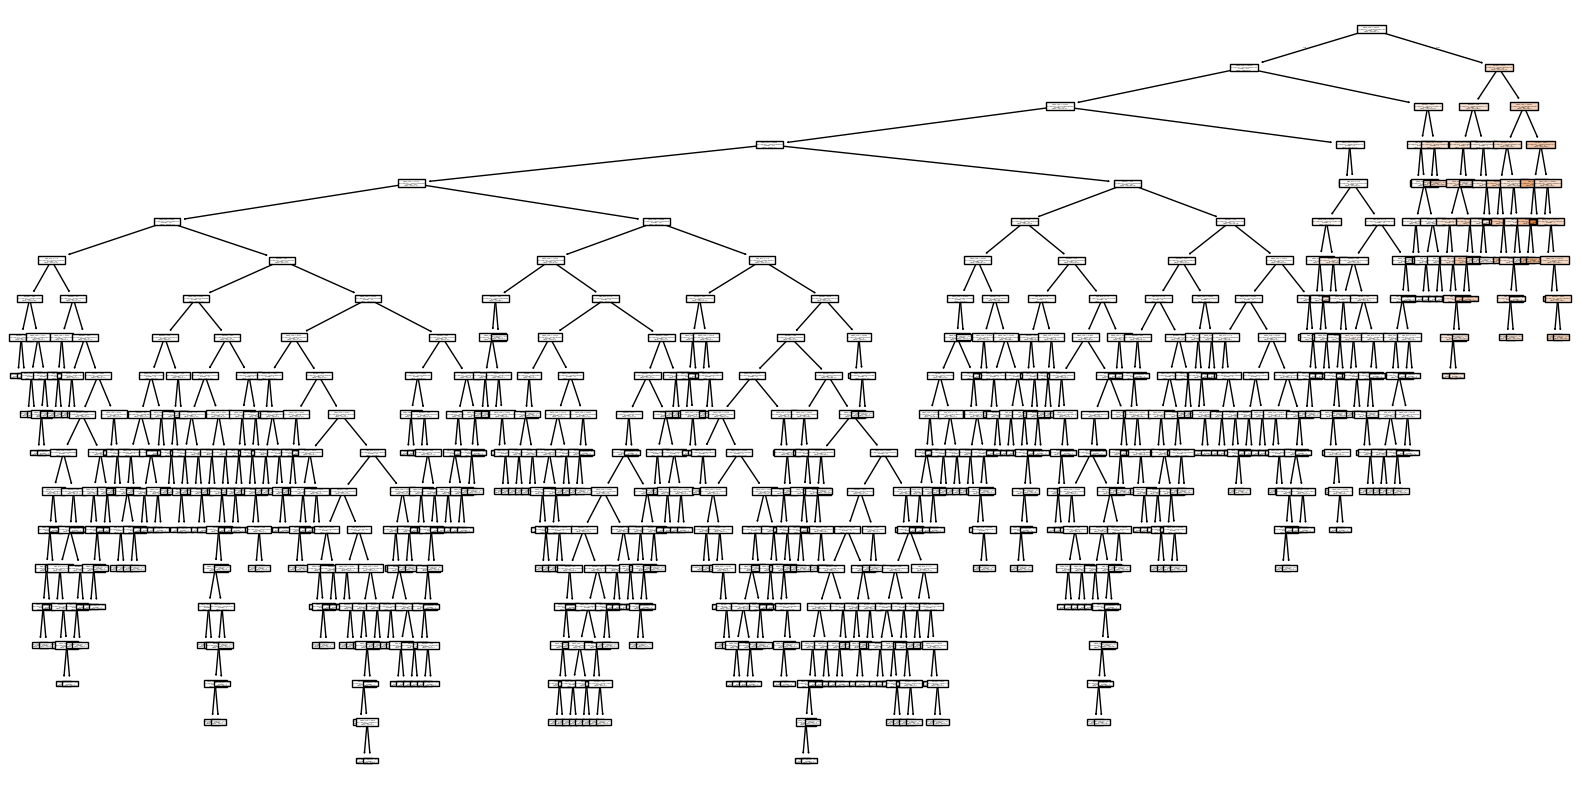

In [229]:
features=['posted','num_beds','home_area']
decision_tree_model(working_data,features)

##### **With features: posted days and area**

Features: ['posted', 'home_area']

Mean Squared Error: 88373348387986.77
R^2 Score: 0.4578084385984452


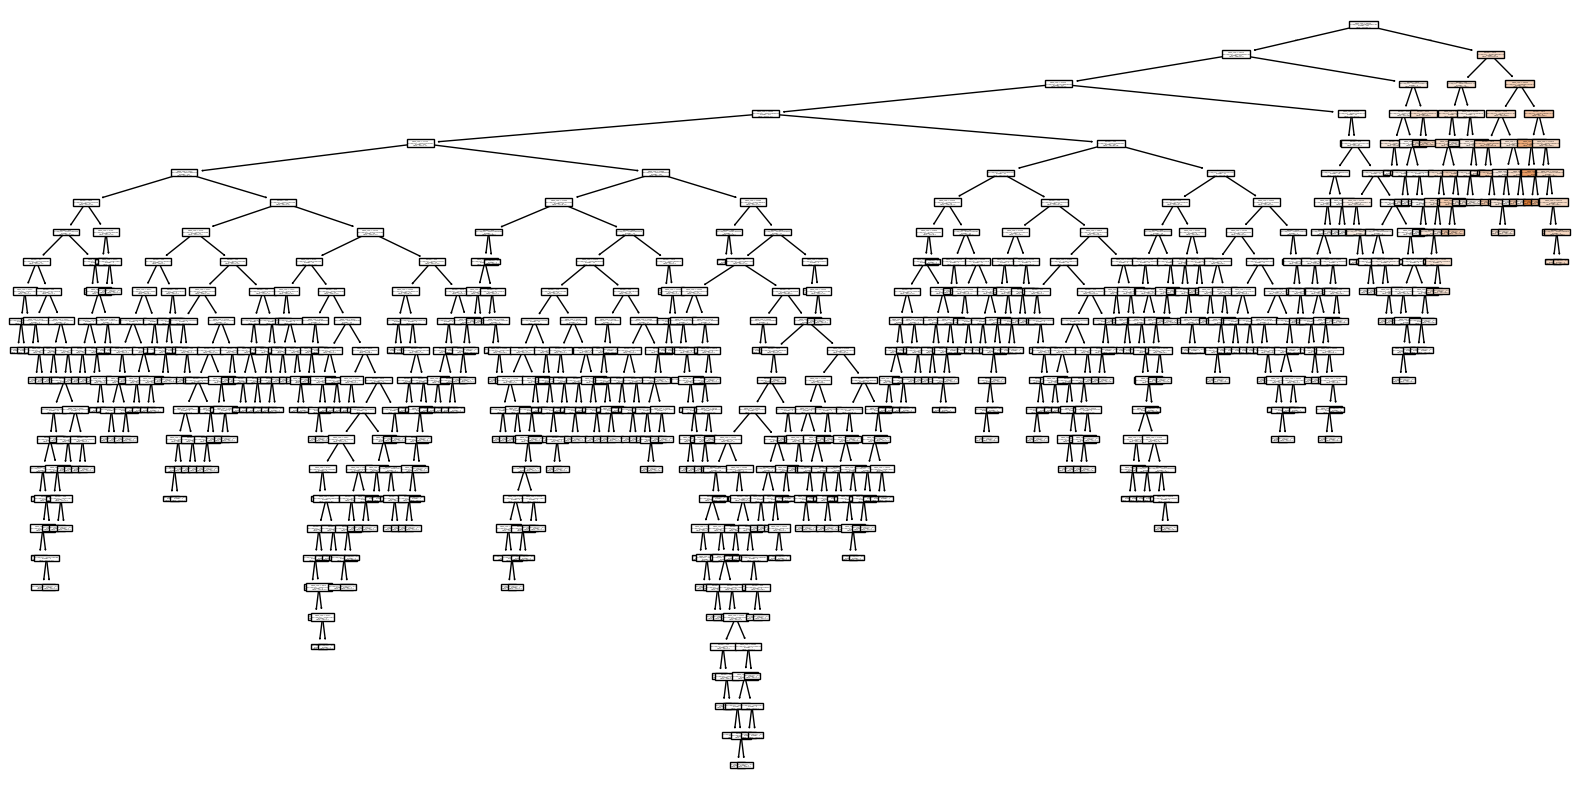

In [230]:
features=['posted','home_area']
decision_tree_model(working_data,features)

#### **Decision tree without categorical variables**

##### **With features: categorical variable of home type and area**

Features: ['home_area', 'home_type_CONDO', 'home_type_MULTI_FAMILY', 'home_type_SINGLE_FAMILY', 'home_type_TOWNHOUSE']

Mean Squared Error: 70069844742680.19
R^2 Score: 0.5701047971906117


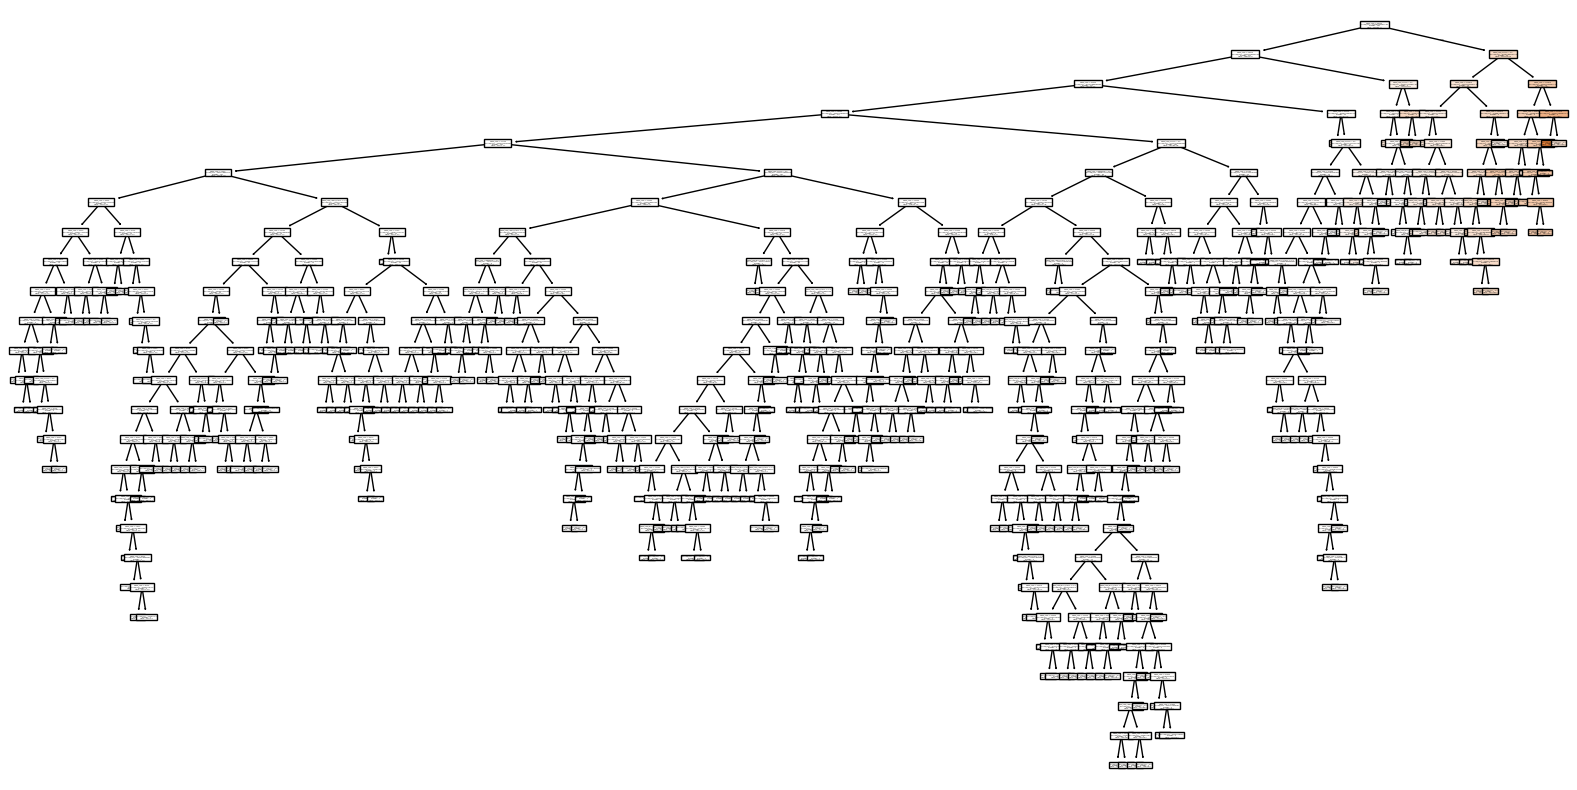

In [232]:
features=['home_area','home_type_CONDO',	'home_type_MULTI_FAMILY',	'home_type_SINGLE_FAMILY',	'home_type_TOWNHOUSE',]
decision_tree_model(working_data,features)

##### **With features: categorical variable of home type, posted days and area**

Features: ['posted', 'home_area', 'home_type_CONDO', 'home_type_MULTI_FAMILY', 'home_type_SINGLE_FAMILY', 'home_type_TOWNHOUSE']

Mean Squared Error: 65572366229638.734
R^2 Score: 0.5976979001094932


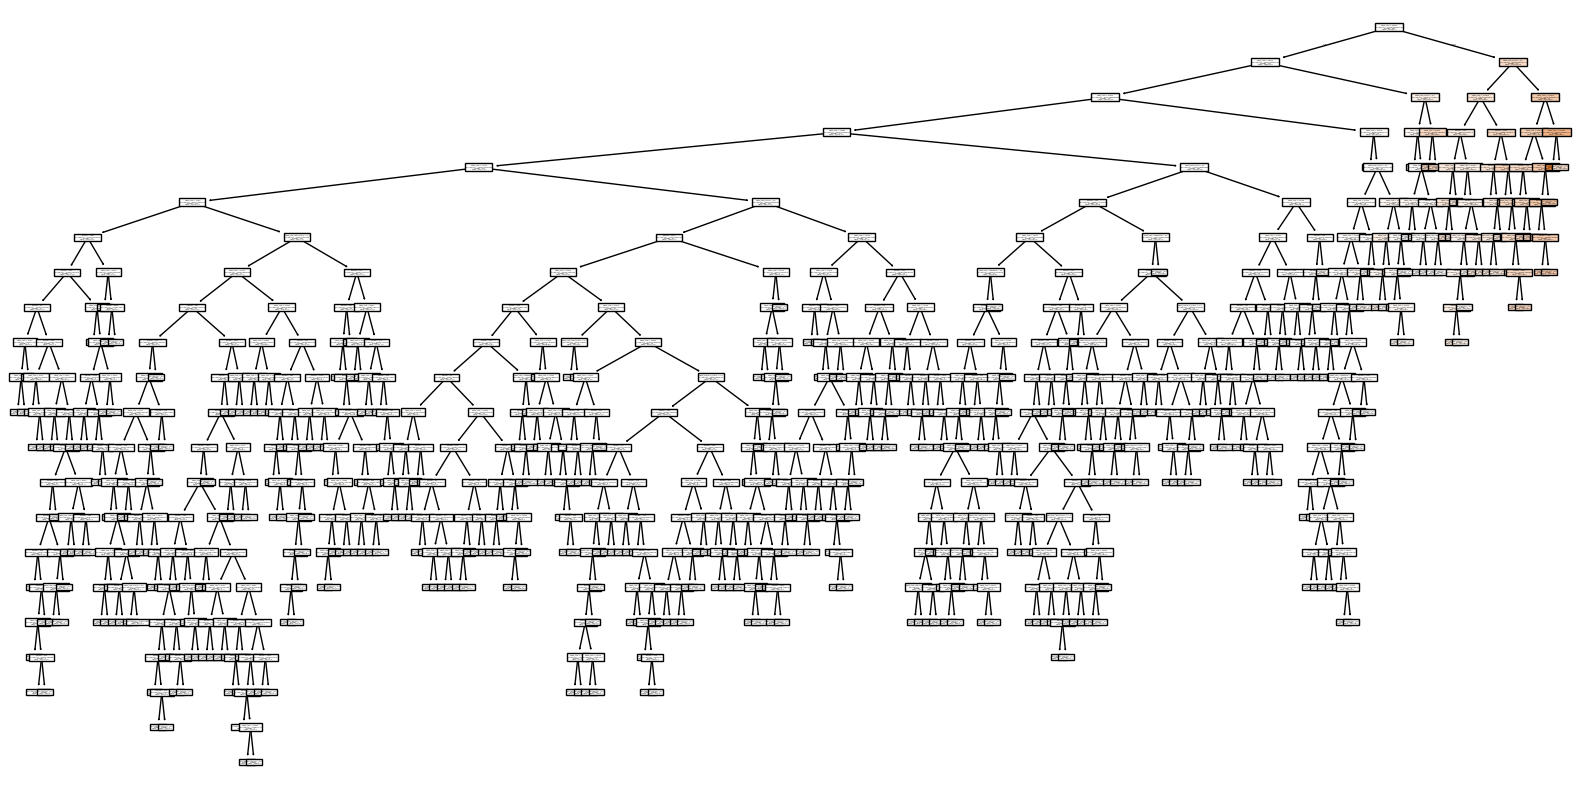

In [233]:
features=['posted','home_area','home_type_CONDO',	'home_type_MULTI_FAMILY',	'home_type_SINGLE_FAMILY',	'home_type_TOWNHOUSE',]
decision_tree_model(working_data,features)

## **Analysis and Results**

**Model without categorical variables:**
  - **Features:** Posted days, number of beds, number of bathrooms, area  
    -**R² Score:** 0.29
- **Features:** Posted days, number of beds, area (removed number of bathrooms)  
      -**R² Score:** 0.36
- **Features:** Posted days, area (minimal set of features)  
      -**R² Score:** 0.45

**Model with categorical variable (home type):**
- **Features:** Home type, area  
      -**R² Score:** 0.57
- **Features:** Home type, area, posted days  
      -**R² Score:** ~0.60


**Impact of Feature Selection:**
   - Removing the number of bathrooms increased the model's R² score from 0.29 to 0.36. This suggests that the number of bathrooms may not contribute significantly to explaining the variance in the target variable.
   - Using only posted days and area further improved the R² score to 0.45, indicating that these two features are the most influential among the non-categorical variables.

**Influence of Categorical Variable (home type):**
   - Adding the categorical variable `home type` resulted in a significant boost in the model's performance, with R² scores reaching 0.57 and ~0.60 when combined with other features.
   - The improvement highlights the importance of including categorical variables that capture property types, as they can significantly explain variations in house characteristics.

**Model Performance Trend:**
   - The model's R² score improved consistently as irrelevant or weak features were removed and more meaningful features (e.g., home type) were added.
   - Including the `home type` categorical variable along with area and posted days yielded the best performance (~0.60), demonstrating the power of combining essential numerical and categorical features.